In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, datasets, layers
import matplotlib.pyplot as plt
import numpy as np

In [13]:
train_set = keras.utils.image_dataset_from_directory(
    directory = "Alzheimer_Dataset/train",
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (64,64)
)


test_set = keras.utils.image_dataset_from_directory(
    directory = "Alzheimer_Dataset/test",
    labels = "inferred",
    label_mode = "categorical",
    batch_size = 32,
    image_size = (64,64)
)



Found 5165 files belonging to 4 classes.
Found 1247 files belonging to 4 classes.


In [14]:
def process(image, label):
    image = tf.cast(image/255, tf.float32)
    return image, label

train_set = train_set.map(process)
test_set = test_set.map(process)

In [15]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu", input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = "relu"))
cnn.add(tf.keras.layers.MaxPool2D((2,2)))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
cnn.add(tf.keras.layers.Dense(units = 4, activation = 'softmax'))



In [16]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 6, 6, 32)         

In [17]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = cnn.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15
162/162 [==============================] - 18s 101ms/step - loss: 1.0284 - accuracy: 0.5022 - val_loss: 1.0343 - val_accuracy: 0.5204
Epoch 2/15
162/162 [==============================] - 16s 99ms/step - loss: 0.9008 - accuracy: 0.5810 - val_loss: 0.9581 - val_accuracy: 0.5333
Epoch 3/15
162/162 [==============================] - 16s 100ms/step - loss: 0.7906 - accuracy: 0.6449 - val_loss: 1.0876 - val_accuracy: 0.4884
Epoch 4/15
162/162 [==============================] - 16s 99ms/step - loss: 0.6268 - accuracy: 0.7315 - val_loss: 1.1697 - val_accuracy: 0.4948
Epoch 5/15
162/162 [==============================] - 16s 98ms/step - loss: 0.4620 - accuracy: 0.8118 - val_loss: 1.6798 - val_accuracy: 0.4306
Epoch 6/15
162/162 [==============================] - 16s 99ms/step - loss: 0.3213 - accuracy: 0.8782 - val_loss: 1.3215 - val_accuracy: 0.5589
Epoch 7/15
162/162 [==============================] - 16s 99ms/step - loss: 0.2221 - accuracy: 0.9195 - val_loss: 1.6262 - val_accurac

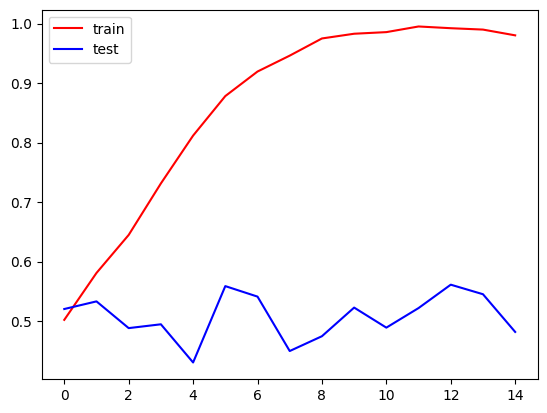

In [18]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'], color = 'blue', label='test')
plt.legend()
plt.show()

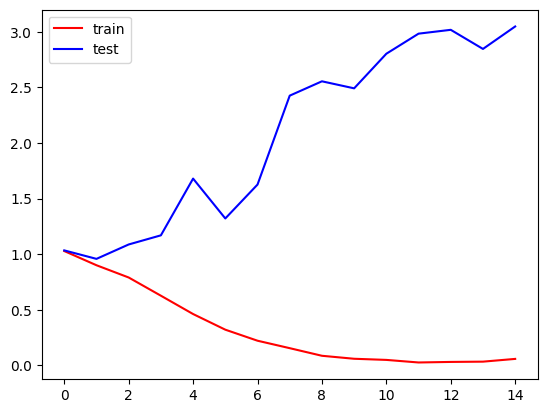

In [19]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'], color = 'blue', label='test')
plt.legend()
plt.show()